In [12]:
import utils
utils.assign_free_gpus()
import torch
import torch.nn as nn
import matplotlib
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import dataloaders
import torchvision
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)
matplotlib.rcParams["figure.dpi"] = 200
from IPython import get_ipython
ip = get_ipython()
ip.run_line_magic("reload_ext", "autoreload")
ip.run_line_magic("autoreload", "2")

Using GPU index: 0


### Dataset

In [13]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

### Hyperparameters & Loss function

In [14]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Task A

In [77]:
# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)

batch_size = 64
learning_rate = .0192
num_epochs = 5

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

image_normalize = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5, True),
])

train_regular, test_regular = dataloaders.load_dataset(batch_size, image_transform)
train_normalized, test_normalized = dataloaders.load_dataset(batch_size, image_normalize)

model_regular = create_model()
# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model_regular.parameters(), lr=learning_rate)

trainer_regular = Trainer(
  model=model_regular,
  dataloader_train=train_regular,
  dataloader_test=test_regular,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_regular, test_loss_regular = trainer_regular.train(num_epochs)

model_normalized = create_model()
optimizer = torch.optim.SGD(model_normalized.parameters(), lr=learning_rate)
trainer_normalized = Trainer(
  model=model_normalized,
  dataloader_train=train_normalized,
  dataloader_test=test_normalized,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_normalized, test_loss_normalized = trainer_normalized.train(num_epochs)

Training epoch 0:   0%|          | 0/938 [00:00<?, ?it/s]

Training epoch 4: 100%|██████████| 938/938 [00:07<00:00, 119.42it/s]


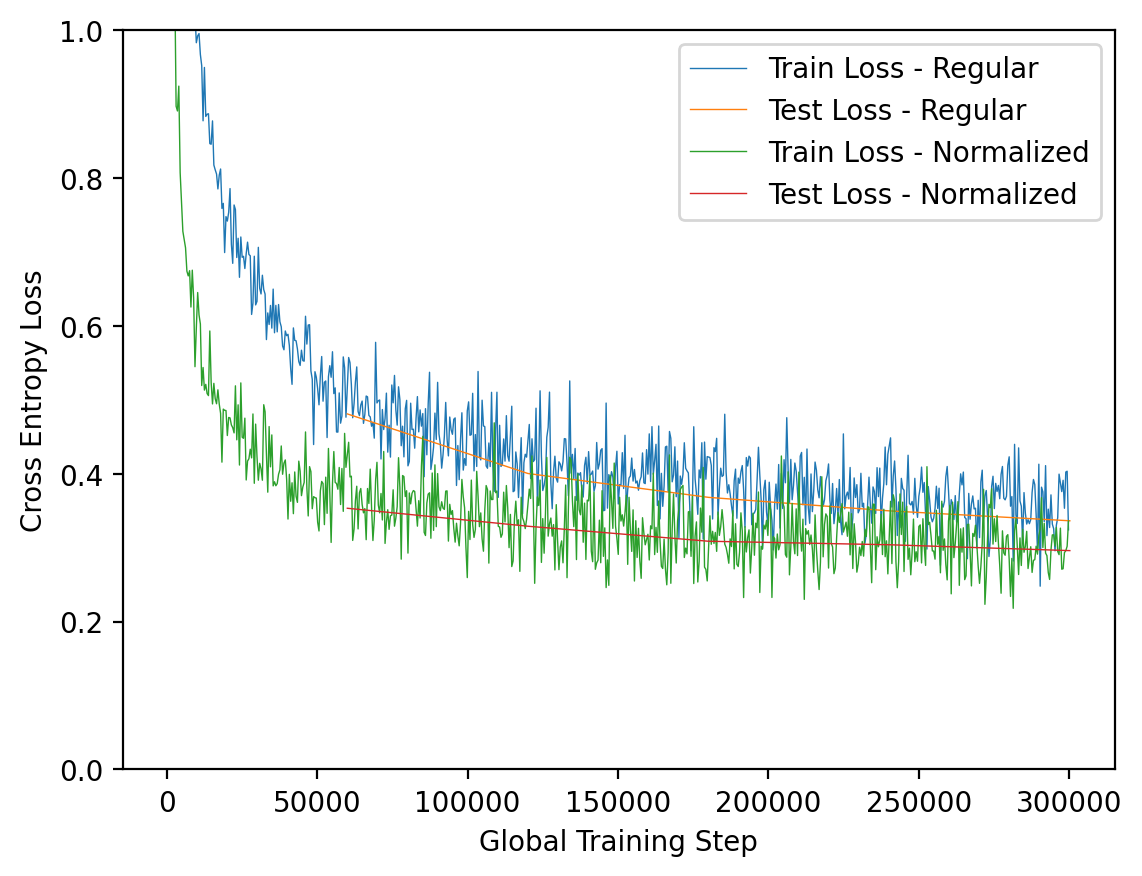

In [ ]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_regular, label="Train Loss - Regular", line_width=0.5)
utils.plot_loss(test_loss_regular, label="Test Loss - Regular", line_width=0.5)
utils.plot_loss(train_loss_normalized, label="Train Loss - Normalized", line_width=0.5)
utils.plot_loss(test_loss_normalized, label="Test Loss - Normalized", line_width=0.5)
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

### Task B

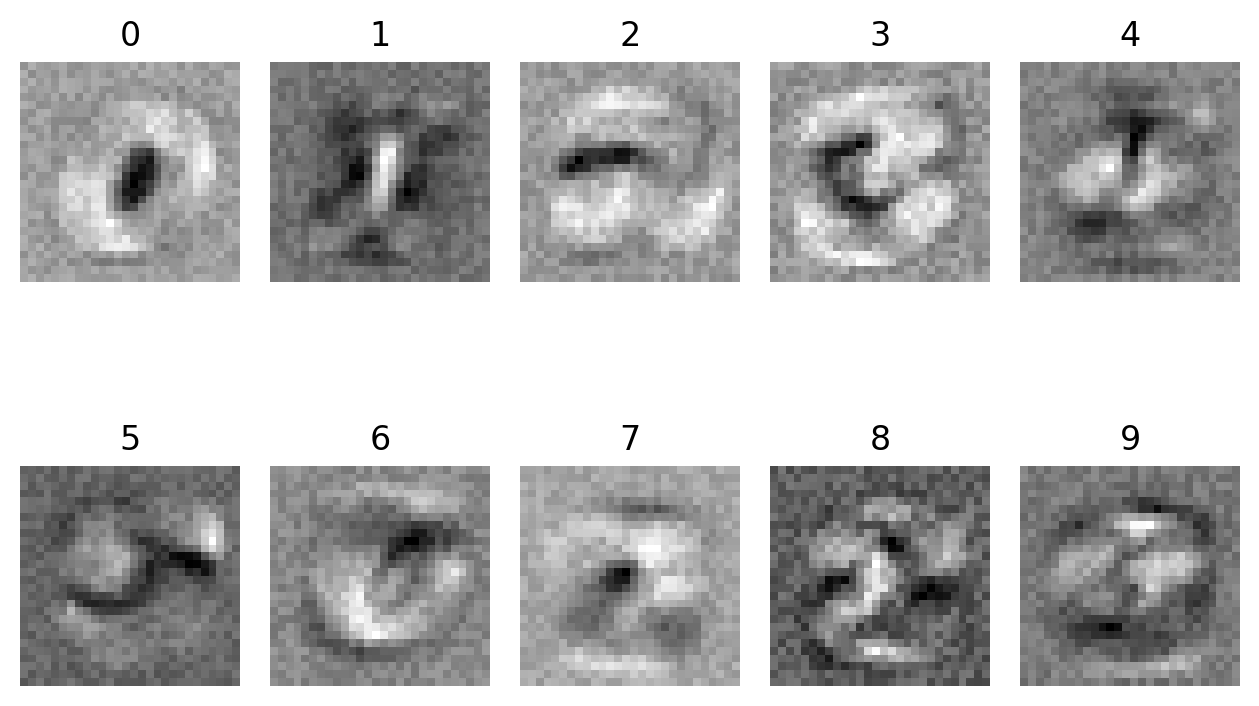

In [45]:
weight = np.array(list(model_normalized.children())[1].weight.cpu().data)

fig = plt.figure()
for i, line in enumerate(weight):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.reshape(line, (28,28)), cmap='gray')
    plt.axis('off')
    plt.title(i)
fig.tight_layout()
plt.show()
#for i, w in enumerate(reshaped_weight[:])

### Task C

In [47]:
# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.

learning_rate = 1.0


model_learner = create_model()
optimizer = torch.optim.SGD(model_learner.parameters(), lr=learning_rate)
trainer_learner = Trainer(
  model=model_learner,
  dataloader_train=train_normalized,
  dataloader_test=test_normalized,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_learner, test_loss_learner = trainer_learner.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:07<00:00, 119.71it/s]


Normalized Test loss: 0.2960397264902379. Normalized Test accuracy: 0.9131
Learner Test loss: 2.1549244224104265. Learner Test accuracy: 0.903


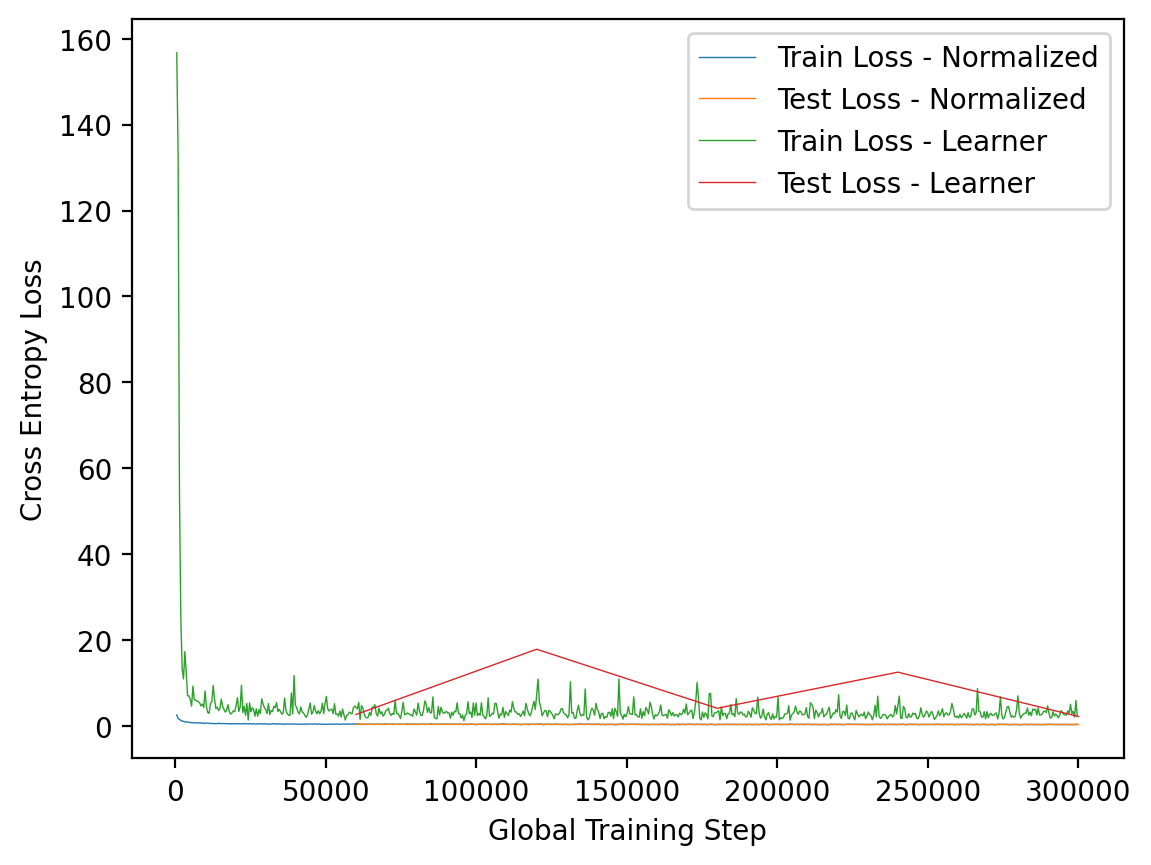

In [54]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_normalized, label="Train Loss - Normalized", line_width=0.5)
utils.plot_loss(test_loss_normalized, label="Test Loss - Normalized", line_width=0.5)
utils.plot_loss(train_loss_learner, label="Train Loss - Learner", line_width=0.5)
utils.plot_loss(test_loss_learner, label="Test Loss - Learner", line_width=0.5)
# Limit the y-axis of the plot (The range should not be increased!)
#plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

loss_normalized, accuracy_normalized = utils.compute_loss_and_accuracy(
    test_normalized, model_normalized, loss_function)
print(f"Normalized Test loss: {loss_normalized}. Normalized Test accuracy: {accuracy_normalized}")

loss_learner, accuracy_learner = utils.compute_loss_and_accuracy(
    test_normalized, model_learner, loss_function)
print(f"Learner Test loss: {loss_learner}. Learner Test accuracy: {accuracy_learner}")

plt.show()

### Task D

In [78]:
batch_size = 64
learning_rate = .0192
num_epochs = 5

model_relu = nn.Sequential(
    nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
    nn.Linear(28*28*1, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    # No need to include softmax, as this is already combined in the loss function
)
# Transfer model to GPU memory if a GPU is available
model_relu = utils.to_cuda(model_relu)

optimizer = torch.optim.SGD(model_relu.parameters(), lr=learning_rate)
trainer_relu = Trainer(
  model=model_relu,
  dataloader_train=train_normalized,
  dataloader_test=test_normalized,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_relu, test_loss_relu = trainer_relu.train(num_epochs)

Training epoch 0:   0%|          | 0/938 [00:00<?, ?it/s]

Training epoch 4: 100%|██████████| 938/938 [00:08<00:00, 113.47it/s]


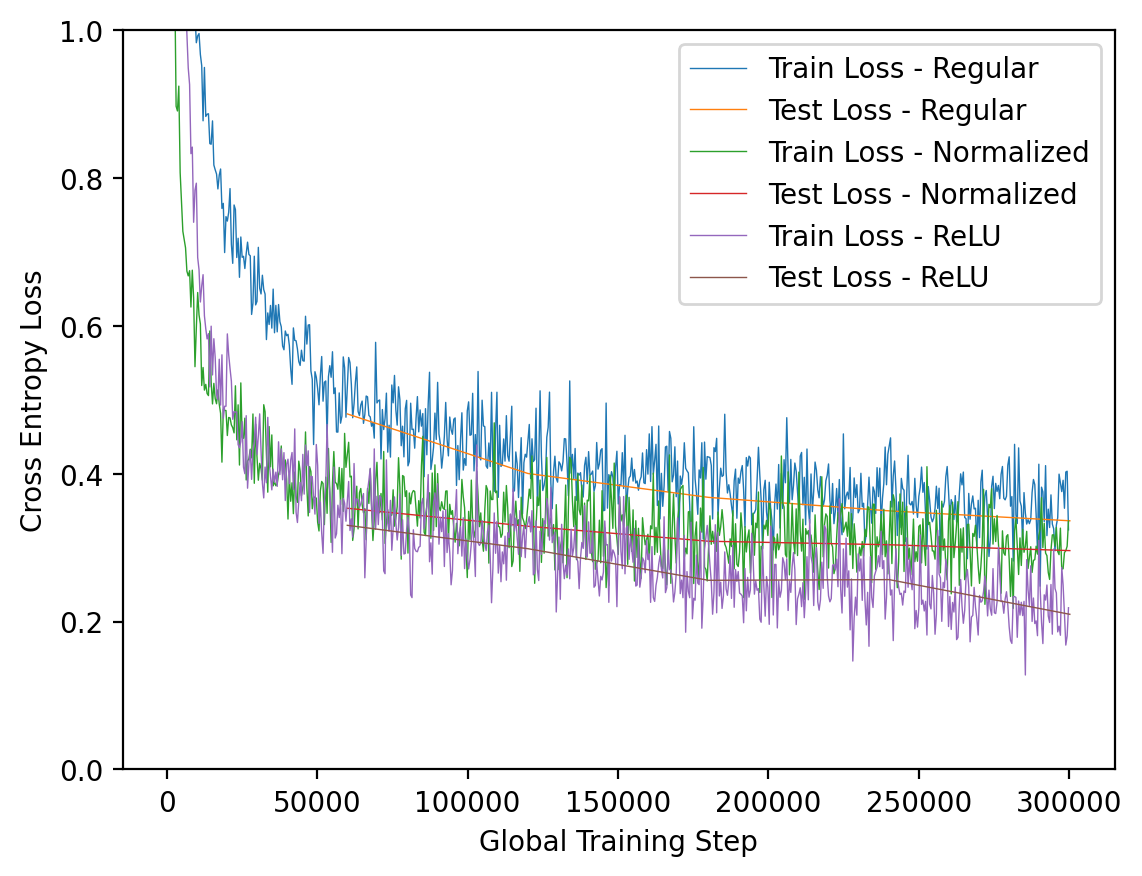

In [79]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_regular, label="Train Loss - Regular", line_width=0.5)
utils.plot_loss(test_loss_regular, label="Test Loss - Regular", line_width=0.5)
utils.plot_loss(train_loss_normalized, label="Train Loss - Normalized", line_width=0.5)
utils.plot_loss(test_loss_normalized, label="Test Loss - Normalized", line_width=0.5)
utils.plot_loss(train_loss_relu, label="Train Loss - ReLU", line_width=0.5)
utils.plot_loss(test_loss_relu, label="Test Loss - ReLU", line_width=0.5)
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")

plt.show()